## Titanic simple

### Dataset

In [25]:
"""
This notebook trains a decision tree that predicts the probability of
survival of Titanic passengers. The model is based on the original passenger list, stored
in a CSV file. The probability of survival is predicted with the features Sex, Class and
Age. In order to simplify matters, the decision tree is trained based on the complete
data set. There is no split between training and test set, nor is the model tested.
"""

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing

# Configuration
DATA_PATH = "../data/"
CSV_PATH = DATA_PATH + "titanic_original.csv"

# Load data set
titanic_frame = pd.read_csv(CSV_PATH, sep=";")
print(titanic_frame.head().to_string(), "\n")

   ID Class   Sex    Age Survived
0   1   3rd  Male  Child       No
1   2   3rd  Male  Child       No
2   3   3rd  Male  Child       No
3   4   3rd  Male  Child       No
4   5   3rd  Male  Child       No 



### Statistics

In [26]:
print("Passengers:", len(titanic_frame))

survivors = titanic_frame[titanic_frame['Survived'] == "Yes"]
print("Survivors:", len(survivors))

survivors_percent = len(survivors) / len(titanic_frame)
print("Survivors %:", survivors_percent * 100)

Passengers: 2201
Survivors: 711
Survivors %: 32.30349840981372


### Features

In [27]:
# Transform strings to numbers
class_encoder = preprocessing.LabelEncoder()
class_encoder.fit(titanic_frame["Class"])

age_encoder = preprocessing.LabelEncoder()
age_encoder.fit(titanic_frame["Age"])

sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(titanic_frame["Sex"])

# Create a data frame with features
feature_frame = pd.DataFrame({
    "Class": class_encoder.transform(titanic_frame["Class"]),
    "Age": age_encoder.transform(titanic_frame["Age"]),
    "Sex": sex_encoder.transform(titanic_frame["Sex"])
})

# Create a data frame with the target variable
target_frame = titanic_frame["Survived"]

print(feature_frame.head().to_string())

   Class  Age  Sex
0      2    1    1
1      2    1    1
2      2    1    1
3      2    1    1
4      2    1    1


### Decision Tree

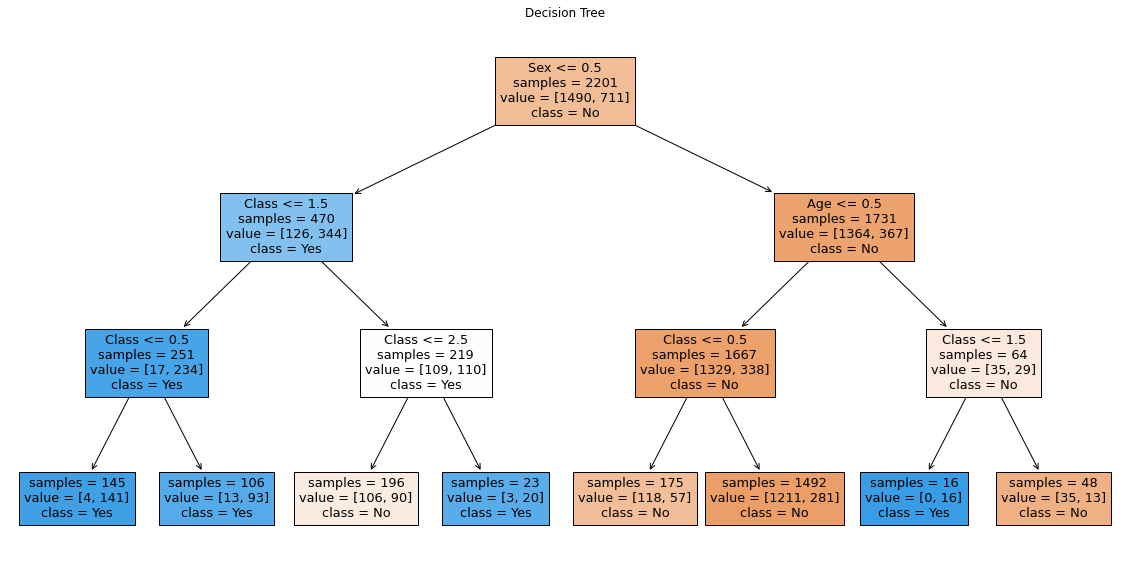

In [28]:
# Train decision tree
tree_model = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
tree_model = tree_model.fit(feature_frame, target_frame)

# Plot decision tree
fig = plt.figure(figsize=(20,10))
tree.plot_tree(
    tree_model,
    feature_names=feature_frame.columns,
    filled=True,
    impurity=False,
    class_names=["No", "Yes"])

plt.title("Decision Tree")
plt.show()